In [47]:
# Importing the required libraries
import statistics
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier as KNC

# Reading the data

In [4]:
# Read the csv file using 'read_csv'
iris = iris = pd.read_csv("C:/Users/user/Desktop/ml/data sheet/Iris.csv")
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


# Inspecting the data frame

In [6]:
# Check the number of rows and columns in the dataframe
iris.shape

(150, 6)

In [7]:
# droping the id column
iris.drop("Id", axis = 1, inplace = True)
iris

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [8]:
# changing column names
iris.columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width','specis']
iris.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'specis'], dtype='object')

# Data analysis

In [9]:
## finding missing value
iris.isnull().sum()   

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
specis          0
dtype: int64

No missing value found in the data set.

<function matplotlib.pyplot.show(close=None, block=None)>

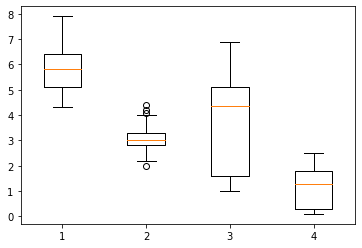

In [11]:
## finding outlier by using box plot
plt.boxplot(iris[['sepal_length','sepal_width', 'petal_length', 'petal_width']])
plt.show

There is outlier in sepal_width but they are very closely arranged. so they will not create any error.

# Splitting the data set

In [52]:
## Splitting data 

train, test = train_test_split(iris,test_size = .2) 

In [53]:
train  ## printing the train data set

,sepal_length,sepal_width,petal_length,petal_width,specis
149,5.9,3.0,5.1,1.8,Iris-virginica
120,6.9,3.2,5.7,2.3,Iris-virginica
8,4.4,2.9,1.4,0.2,Iris-setosa
32,5.2,4.1,1.5,0.1,Iris-setosa
70,5.9,3.2,4.8,1.8,Iris-versicolor
...,...,...,...,...,...
105,7.6,3.0,6.6,2.1,Iris-virginica
28,5.2,3.4,1.4,0.2,Iris-setosa
18,5.7,3.8,1.7,0.3,Iris-setosa
90,5.5,2.6,4.4,1.2,Iris-versicolor


In [16]:
test # printing test data set

,sepal_length,sepal_width,petal_length,petal_width,specis
93,5.0,2.3,3.3,1.0,Iris-versicolor
57,4.9,2.4,3.3,1.0,Iris-versicolor
39,5.1,3.4,1.5,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
70,5.9,3.2,4.8,1.8,Iris-versicolor
16,5.4,3.9,1.3,0.4,Iris-setosa
86,6.7,3.1,4.7,1.5,Iris-versicolor
4,5.0,3.6,1.4,0.2,Iris-setosa
115,6.4,3.2,5.3,2.3,Iris-virginica
49,5.0,3.3,1.4,0.2,Iris-setosa


# KNN

Here for the set of test data for which the true values are known and it is discrete, so for the prediction KNN classification model will be used.

In [18]:
# creating model
knn_model = KNC(n_neighbors = 3) 

Creating the model by taking k=3.

In [19]:
# training model
knn_model.fit(X = train.iloc[:,0:4], y = train.iloc[:,4])

KNeighborsClassifier(n_neighbors=3)

In [21]:
## predict
predicted_y_test = knn_model.predict(X = test.iloc[:,0:4])
predicted_y_test

array(['Iris-versicolor', 'Iris-versicolor', 'Iris-setosa', 'Iris-setosa',
       'Iris-virginica', 'Iris-setosa', 'Iris-versicolor', 'Iris-setosa',
       'Iris-virginica', 'Iris-setosa', 'Iris-virginica',
       'Iris-versicolor', 'Iris-virginica', 'Iris-setosa',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-setosa', 'Iris-versicolor', 'Iris-virginica',
       'Iris-virginica', 'Iris-versicolor', 'Iris-setosa',
       'Iris-versicolor', 'Iris-virginica', 'Iris-setosa',
       'Iris-virginica', 'Iris-setosa', 'Iris-setosa', 'Iris-virginica'],
      dtype=object)

In [23]:
# actual 
actual_y_test = test.iloc[:,4]
actual_y_test 

93     Iris-versicolor
57     Iris-versicolor
39         Iris-setosa
8          Iris-setosa
70     Iris-versicolor
16         Iris-setosa
86     Iris-versicolor
4          Iris-setosa
115     Iris-virginica
49         Iris-setosa
110     Iris-virginica
119     Iris-virginica
127     Iris-virginica
36         Iris-setosa
50     Iris-versicolor
89     Iris-versicolor
85     Iris-versicolor
13         Iris-setosa
98     Iris-versicolor
131     Iris-virginica
130     Iris-virginica
71     Iris-versicolor
42         Iris-setosa
52     Iris-versicolor
144     Iris-virginica
41         Iris-setosa
137     Iris-virginica
35         Iris-setosa
31         Iris-setosa
122     Iris-virginica
Name: specis, dtype: object

# Confusion matrix

Check for accuracy of model by confusion matrix. BY cross tabulation checking the actual y of test data with predicted y of test data.

In [32]:
# creating confusion matrix

table = pd.crosstab(actual_y_test,predicted_y_test)  
table

col_0,Iris-setosa,Iris-versicolor,Iris-virginica
specis,,,
Iris-setosa,11,0,0
Iris-versicolor,0,9,1
Iris-virginica,0,1,8


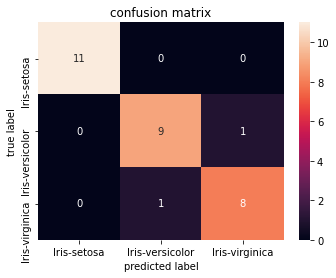

In [33]:
# ploting the confusion matrix 
plt.figure(figsize=(5.5,4))  # figure size
sns.heatmap(table, annot = True)  ## annot are the values
plt.title("confusion matrix")
plt.ylabel("true label")
plt.xlabel("predicted label")
plt.show()

In [35]:
accuracy = np.mean(predicted_y_test == actual_y_test)
accuracy

0.9333333333333333

In [36]:
## create a loop for multiple KNN model iteration = k
acc = []

In [37]:
for k in range(1,120):
    knn_model = KNC(n_neighbors = k)
    knn_model.fit(X = train.iloc[:,0:4], y = train.iloc[:,4])
    predicted_y_test = knn_model.predict(X = test.iloc[:,0:4])
    acc.append(np.mean(predicted_y_test == actual_y_test))

In [38]:
## creating accuracy data frame for storing accuracy value
acc_df = pd.DataFrame(acc)

In [42]:
##  creating a column k for n_neighbour
acc_df["k"] = range(1,120)  
acc_df.columns = ["accuracy","k"]

In [50]:
acc_df  # print

,accuracy,k
0,0.933333,1
1,0.900000,2
2,0.933333,3
3,0.933333,4
4,0.933333,5
...,...,...
114,0.466667,115
115,0.466667,116
116,0.466667,117
117,0.466667,118


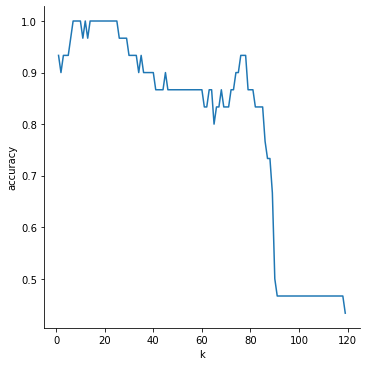

In [44]:
## ploting the accuracy
sns.relplot(x = "k", y = "accuracy", kind = "line", data = acc_df)

If k is low it creates noise and if k is high it creates lots of bias. So selecting k value as square root of no of training data.

In [48]:
# selecting k value
statistics.sqrt(120)

10.954451150103322

In [51]:
acc_df[0:12]

,accuracy,k
0,0.933333,1
1,0.900000,2
2,0.933333,3
3,0.933333,4
4,0.933333,5
5,0.966667,6
6,1.000000,7
7,1.000000,8
8,1.000000,9
9,1.000000,10


# Conclusion

The k = 10.95 ie lets say 11. so k  will be the 10th index of the acc_df and the accuracy of the KNN model is 0.966667